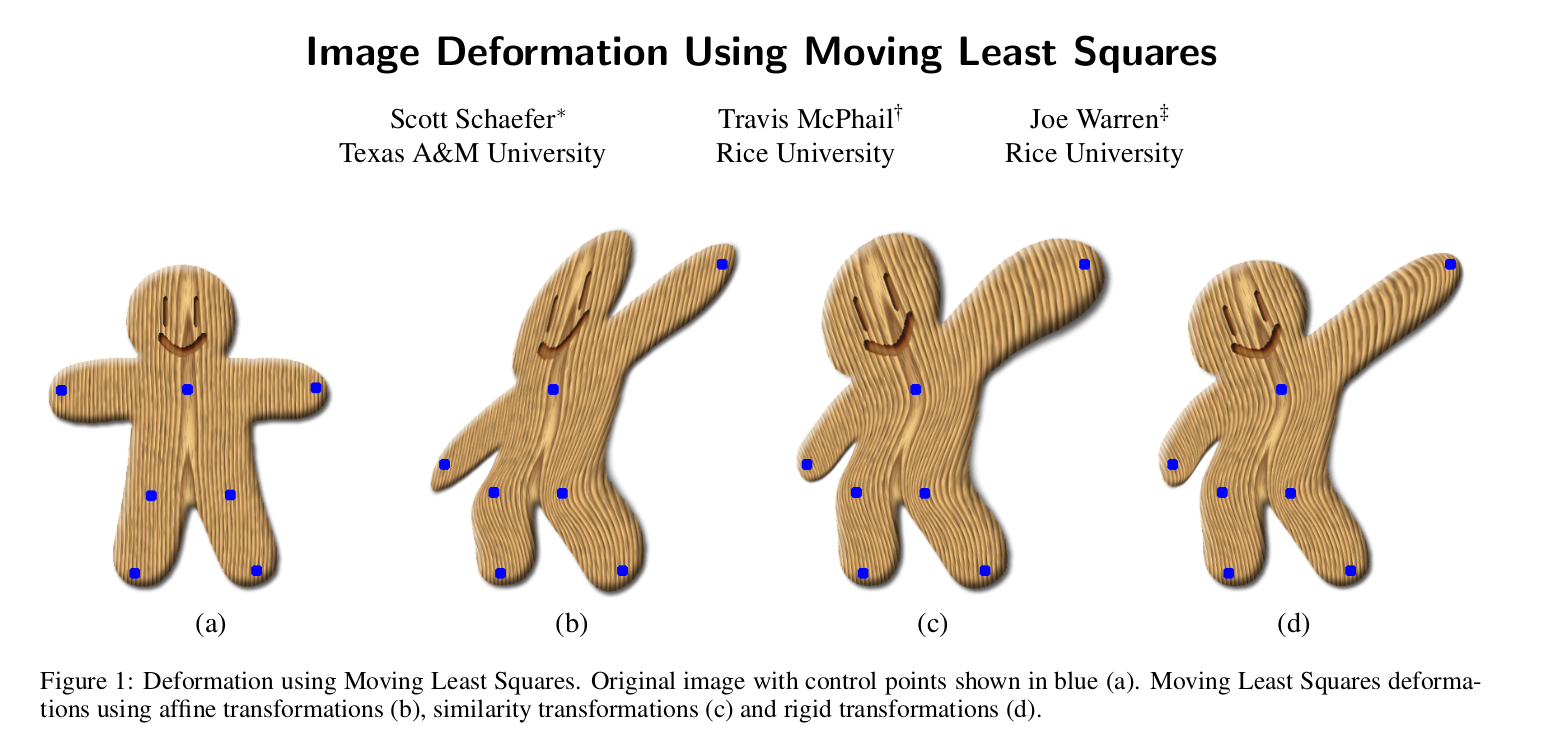
Paper link: https://people.engr.tamu.edu/schaefer/research/mls.pdf

### Abstract: 
We provide an image deformation method based on Moving Least Squares using various classes of linear functions including affine, similarity and rigid transformations. These deformations are realistic and give the user the impression of manipulating real-world objects.

### The Idea of Moving Least Squares 
Refer to  [A Simple Introduction to Moving Least Squares and
Local Regression Estimation](https://www.researchgate.net/publication/318661057_Title_A_Simple_Introduction_to_Moving_Least_Squares_and_Local_Regression_Estimation_Intended_for_A_Simple_Introduction_to_Moving_Least_Squares_and_Local_Regression_Estimation)

#### 1. Global least square and weighted global least square

The goal is to minimize function $\sum{_i}w_i|u(x_i）-u_i|^2 $, where $u(x)$ is the approximate function, $u_i$ is the data points

<div>
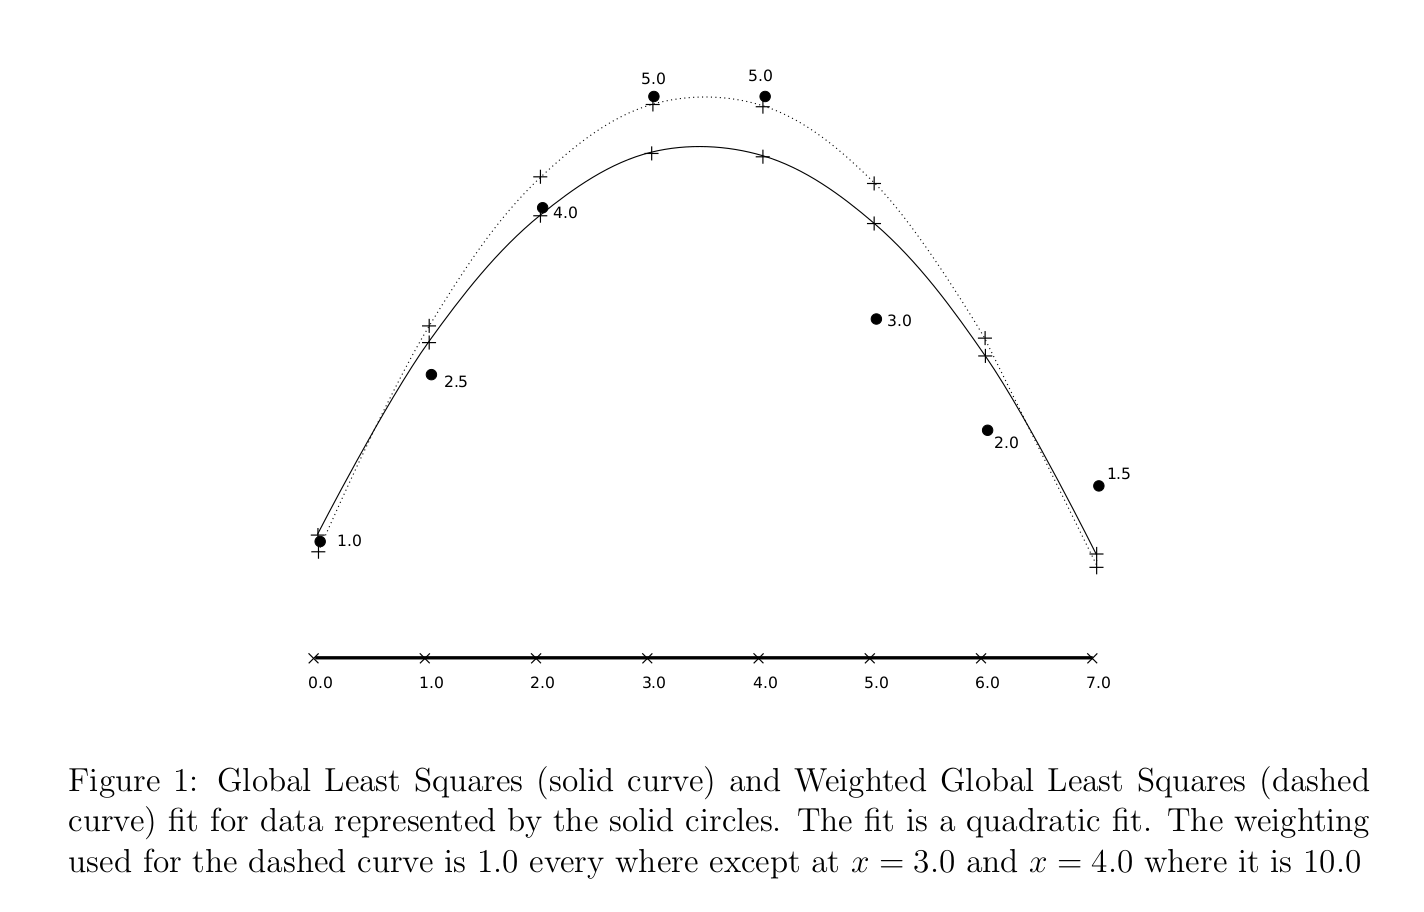
</div>

#### 2. Weighted local least square
Fit each data point and it's neighbors. Means each point $p$ has it own function $u_p(x)$.

We can use same target function but just simply set w = 0 for points far away from the $p$ $\sum{_i}w_i|u(x_i）-u_i|^2 $
<div>
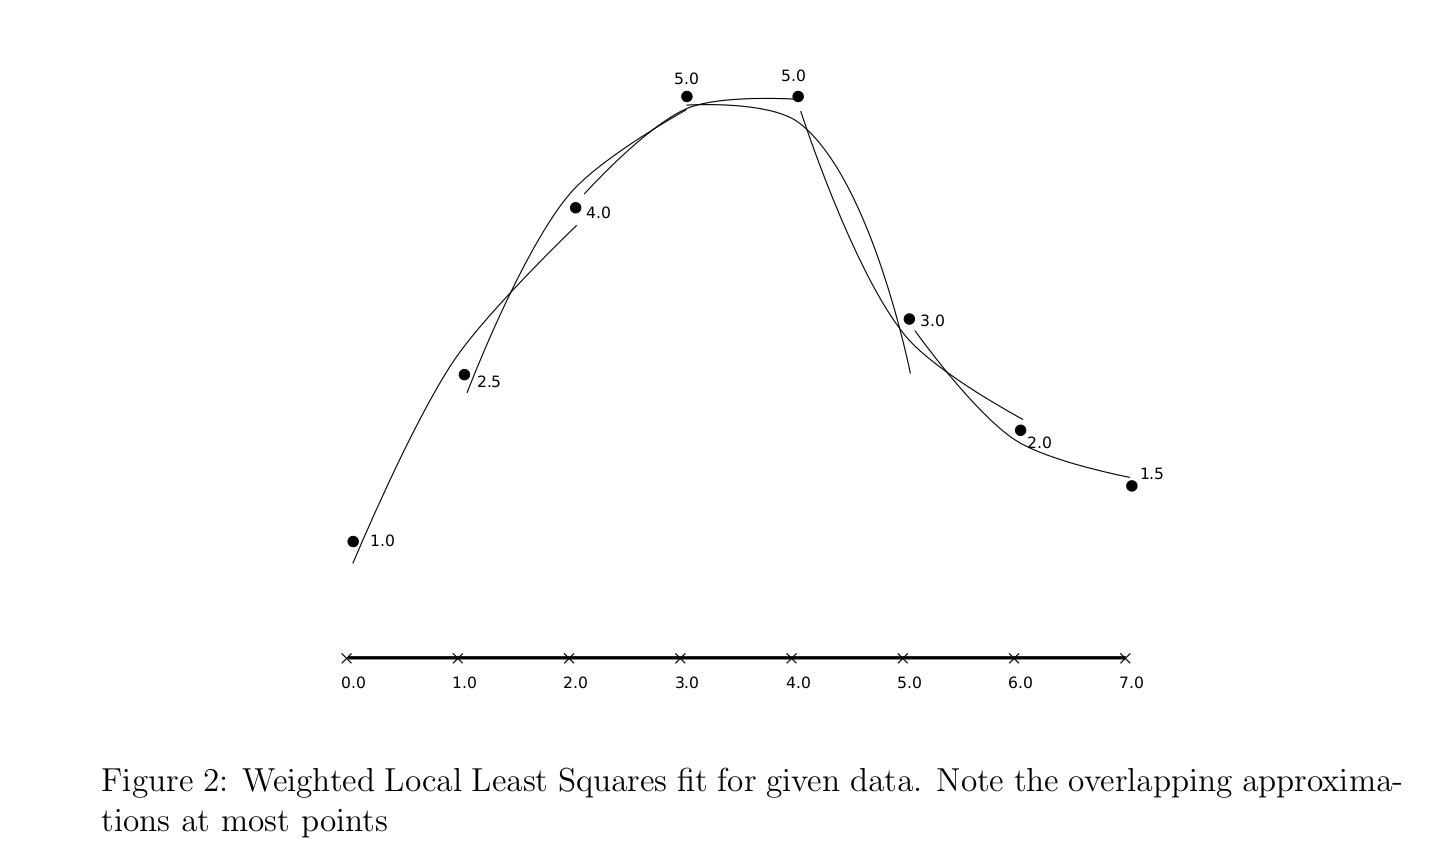
</div>


#### 3.Moving least square 
Moving least squre is build upon the notion of the Weighted Local Least Squares and extend it to build a local solution at any point x̃ in the domain rather than at the discrete points for which we have data.

Our target function now become $\sum{_i}w_i(x̃-x_i)|u(x_i）-u_i|^2 $, weights are now a continuous function of the distance from $x_i$ the point x̃.  
An example, $w_i = \frac{1}{(x_i - x̃)^2}$

<div>
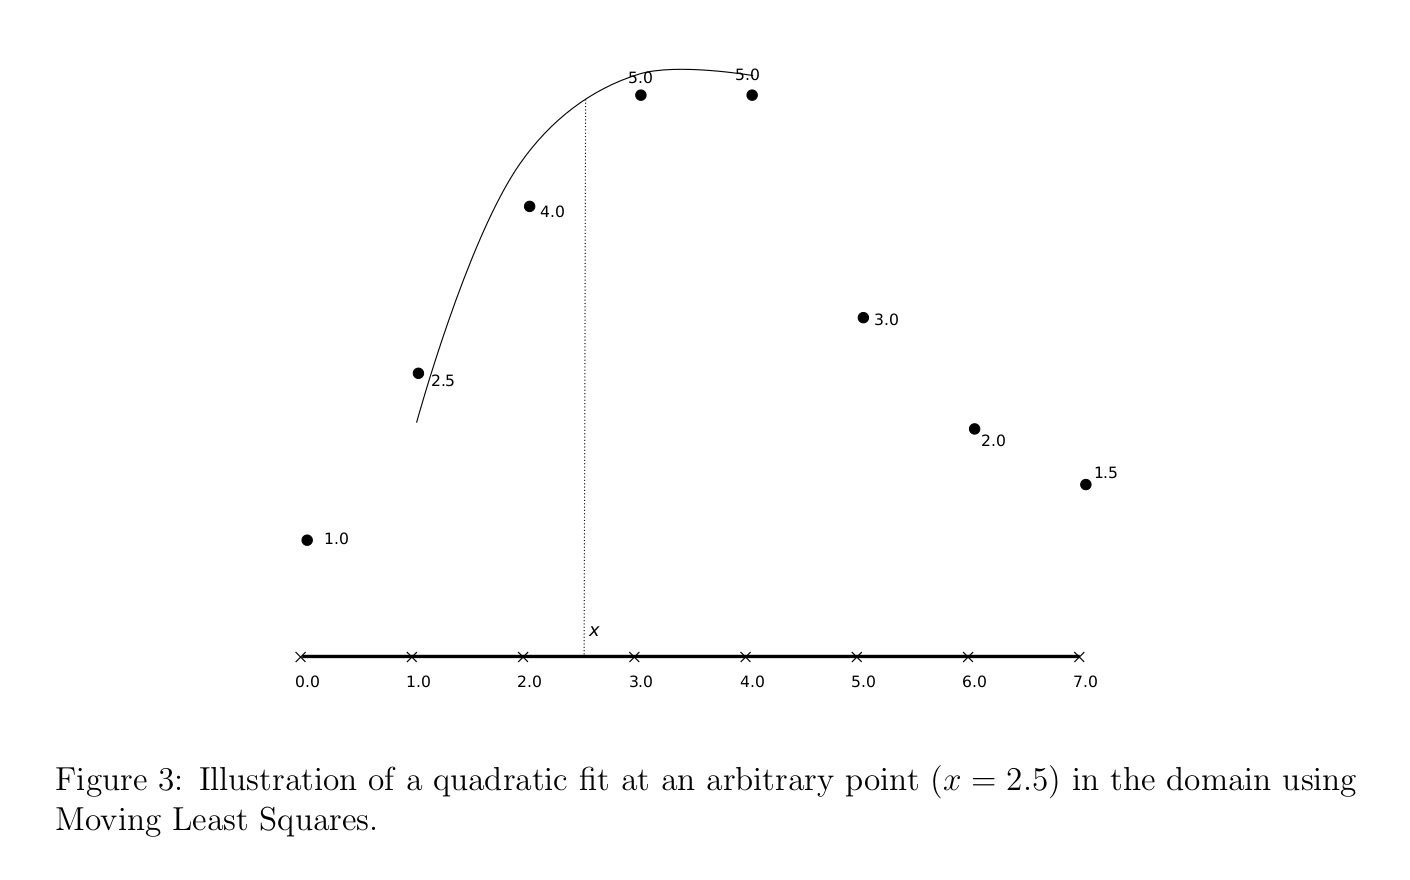
</div>

#### We can describe the Deformation as
Function $f$ maps points in the undeformed image to the deformed image. 
Applying the function $f$  to each point $v$ in the undeformed image creates the deformed image. 


In practice, we let user set handles $p$ that moves to new positions $q$. For $f$  to be useful for deformations it must satisfy the following properties:

- Interpolation: The handles p should map directly to q under
deformation. (i.e; $f(p_i) = q_i$ ).
- Smoothness: f should produce smooth deformations
- Identity: If the deformed handles q are the same as the p, then
f should be the identity function. (i.e; $q_i = p_i ⇒ f(v) = v$). 

Given a point **v** in the image, we solve for the best transformation $f(v)$ for vertex **v** by minimizes equation:

$G = \sum{_i}w_i|f(p_i）-q_i|^2 $, where, $w_i = \frac{1}{|p_i - v|^{2\alpha}}$          

Because the weights $w_i$ in this least squares problem are dependent on the point of evaluation v, we call this a Moving Least Squares minimization. Therefore, we obtain a transformation $f(v)$ for each v.

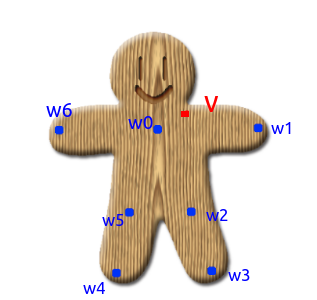

### Transformation functions choose 
**1. Affine transformation**

**2. Similarity transformation** 

**3. Rigid transformation**

### Affine transformation
$l_v (x) = xM + T$ is a affine transoformation for vertex **v**.

Replace $f$ with $l_v(x)$ in $G =\sum{w_i|f(p_i）-q_i|^2} $

we get  $G =\sum{w_i|p_iM + T-q_i|^2} $.

Since the minimizer is where the derivatives with respect to each of the free variables in $l_v(x)$ are zero, we can solve directly for T to first remove the translation T from this minimization problem.

$$
\begin{align}
\frac{\partial G}{\partial T} &=
\sum{w_i(p_iM+T-q_i)}\\
&= \sum{w_ip_iM}+\sum{w_iT} - \sum{q_i}= 0 \\
T &= q_* - p_*M \\
\end{align}
$$

where $p_∗$ and $q_∗$ are weighted centroids
$$
\begin{align}
& q_* = \frac{\sum{w_iq_i}}{\sum{w_i}}, 
p_* = \frac{\sum{w_ip_i}}{\sum{w_i}}
\end{align}
$$
Now, we can rewrite $l_v(x)$ to be: 

$l_v (x)= （x - p_*)M+  q_*$   and rewirte G to be:
$$
\begin{align}
G &=\sum{w_i|\hat{p_i}M - \hat{q_i}|^2} \\
\end{align}
$$
where $\hat{p_i} = p_i − p_∗$ and $\hat{q_i} = q_i − q_∗$

To minimizes G, we can use straight-forward using the classic normal equations solution.

A solution for $Ax=b$: is $ \hat{x} = (A^TA)^{-1}A^Tb$

Normal solution for least square [video](https://www.youtube.com/watch?v=Zu-UlcfPPUk) and [paper](https://math.mit.edu/icg/resources/teaching/18.085-spring2015/LeastSquares.pdf)


$$
\begin{equation}
M = \left( \sum{\hat{p_i}w_i\hat{p_i}} \right)^{-1} \sum{w_j\hat{p_j}^T \hat{q_j}}
\end{equation}
$$


$$
\begin{align}
f_a(v) &=（v - p_*)M+  q_*\\
&= （v - p_*)\left( \sum{\hat{p_i}w_i\hat{p_i}} \right)^{-1} \sum{w_j\hat{p_j}^T \hat{q_j}} +  q_*\\
\end{align}
$$ 

Applying this deformation function $f_a(v)$ to each point in the image creates a new, deformed image

#### Precompute
While the user creates these deformations by manipulating points q, the handles p are fixed. Since the p do not change during deformation. We can rewrite above $f_a(v)$ to be:

$$
\begin{equation}
f_a(v) = \sum{ A_j\hat{q_j} + q_∗}\\
 A_j = （v - p_*)\left( \sum{\hat{p_i}w_i\hat{p_i}} \right)^{-1}w_j\hat{p_j}^T
\end{equation}
$$

When implement, they actually not deform every pixel. Instead approximate the image with a grid and apply the deformation function to each vertex in the grid, then fill the resulting quads using bilinear interpolation.

<div>
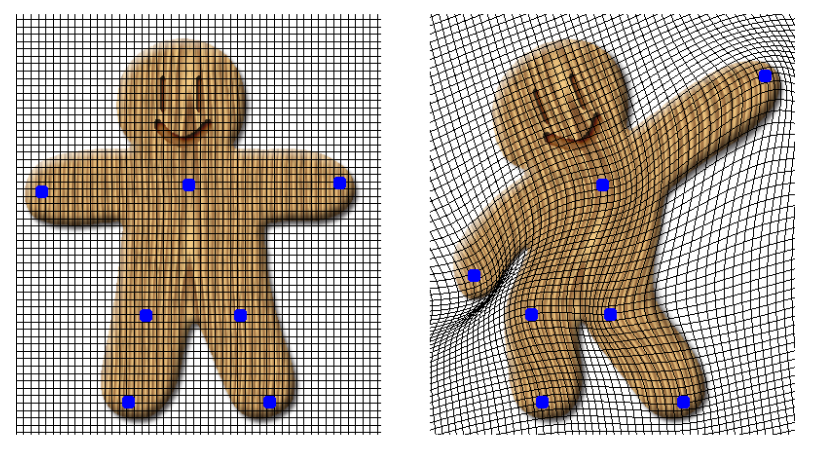
</div>


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from img_utils import mls_affine_deformation, mls_similarity_deformation, mls_rigid_deformation

In [44]:
image = cv2.imread('images/demo.jpg')
image = image[:,:,[2,1,0]]
plt.imshow(image),plt.show()

(<matplotlib.image.AxesImage at 0x7f83928a7ad0>, None)

In [54]:
p = np.array([
    [211,244,],[258,238]
])
q = p.copy()
# q[[0,1]] = q[[1,0]]
q[0][0] -= 20
q[0][1] -= 20
q[1][0] += 20
q[1][1] -= 20
plt.imshow(image)
plt.plot(q[:,0],q[:,1],'b.')
plt.plot(p[:,0],p[:,1],'r.'),plt.show()

([<matplotlib.lines.Line2D at 0x7f839165cc90>], None)

In [53]:
plt.figure(figsize=(8, 3))
plt.subplot(141)
plt.axis('off')
plt.imshow(image)
plt.title("Original Image")

transformed_image = mls_affine_deformation(image, p, q, alpha=1, density=0.5)
plt.subplot(142)
plt.axis('off')
plt.imshow(transformed_image)
plt.title("Affine")

transformed_image = mls_similarity_deformation(image, p, q, alpha=1, density=1)
plt.subplot(143)
plt.axis('off')
plt.imshow(transformed_image)
plt.title("Similarity")

transformed_image = mls_rigid_deformation(image, p, q, alpha=1, density=1)
plt.subplot(144)
plt.axis('off')
plt.imshow(transformed_image)
plt.title("Rigid ")


plt.tight_layout(w_pad=0.1)
plt.show()

### Texture transfer example
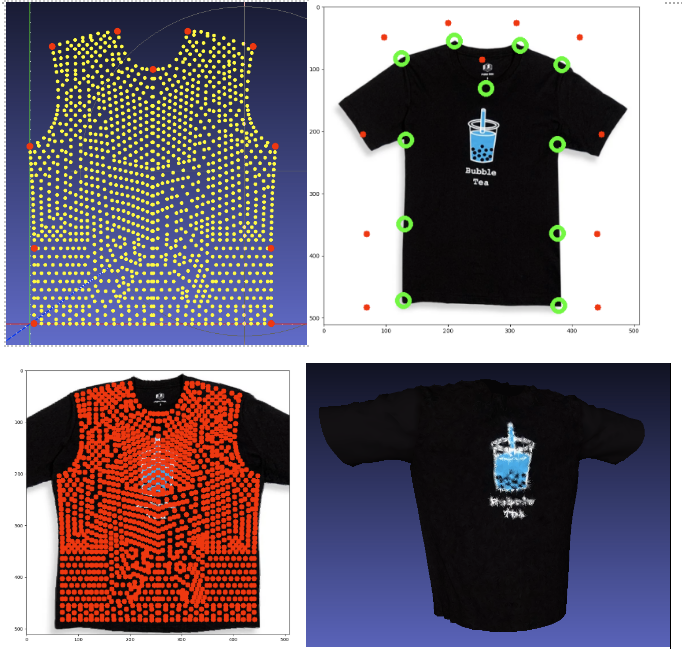